In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [70]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()


In [71]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.



In [72]:
x_train = x_train[..., tf.newaxis] #adds a additional axis (60000,28,28) --> (60000,28,28,1)
x_test = x_test[..., tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [73]:
tf.random.normal(shape=x_train.shape)

<tf.Tensor: shape=(60000, 28, 28, 1), dtype=float32, numpy=
array([[[[-6.15706801e-01],
         [-1.92461479e+00],
         [-7.49510944e-01],
         ...,
         [-1.45804077e-01],
         [-3.53105158e-01],
         [ 8.54020119e-01]],

        [[ 1.49419522e+00],
         [-8.75689566e-01],
         [-1.36247385e+00],
         ...,
         [ 5.93041003e-01],
         [-7.00121939e-01],
         [ 1.19097590e+00]],

        [[ 6.68827832e-01],
         [-1.38326097e+00],
         [-1.03982079e+00],
         ...,
         [ 7.04697192e-01],
         [-7.17811286e-01],
         [-1.29924750e+00]],

        ...,

        [[-1.73959029e+00],
         [ 5.13956487e-01],
         [ 2.07275319e+00],
         ...,
         [-2.59359527e+00],
         [ 7.27894127e-01],
         [-9.22889471e-01]],

        [[ 1.72118771e+00],
         [-5.65936744e-01],
         [-2.05281615e-01],
         ...,
         [ 1.03752184e+00],
         [ 1.98633480e+00],
         [-1.68108916e+00]],

      

In [152]:
noise_factor = 0.1
x_train_noisy = x_train  +  noise_factor * tf.random.normal(shape=x_train.shape)
# noise factor multiplication result in increased spread in noise distribution
# result in 0.2^2 increase of variance, mean doesn't chnage (mean = 0)
x_test_noisy = x_test  +  noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [153]:
x_test_noisy.shape

TensorShape([10000, 28, 28, 1])

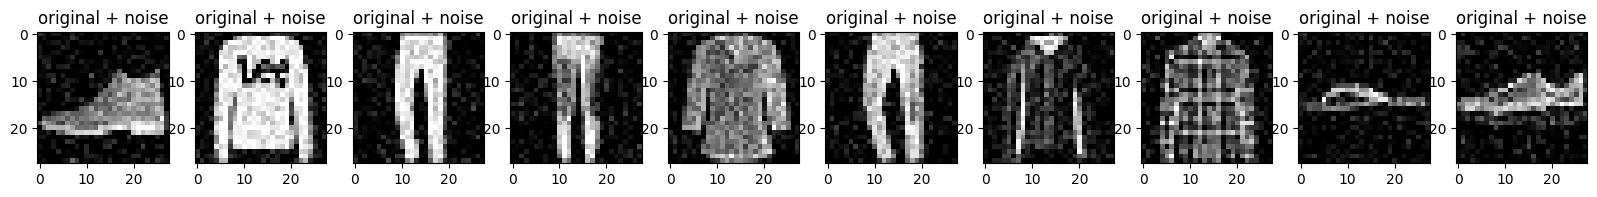

In [154]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [155]:
class Denoise(Model):
    def __init__(self):
        super(Denoise, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Input(shape=(28, 28, 1)),
          layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
          layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

        self.decoder = tf.keras.Sequential([
          layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
          layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [156]:
autoencoder = Denoise()

In [157]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [158]:
loss_data = autoencoder.fit(x_train_noisy, x_train,
                #epochs=10,
                  # change the number of epochs to 30
                epochs=30,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - loss: 0.0311 - val_loss: 0.0077
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 12

In [159]:
autoencoder.encoder.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
autoencoder.decoder.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_16                  │ (32, 14, 14, 8)             │             584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_17                  │ (32, 28, 28, 16)            │           1,168 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (32, 28, 28, 1)             │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

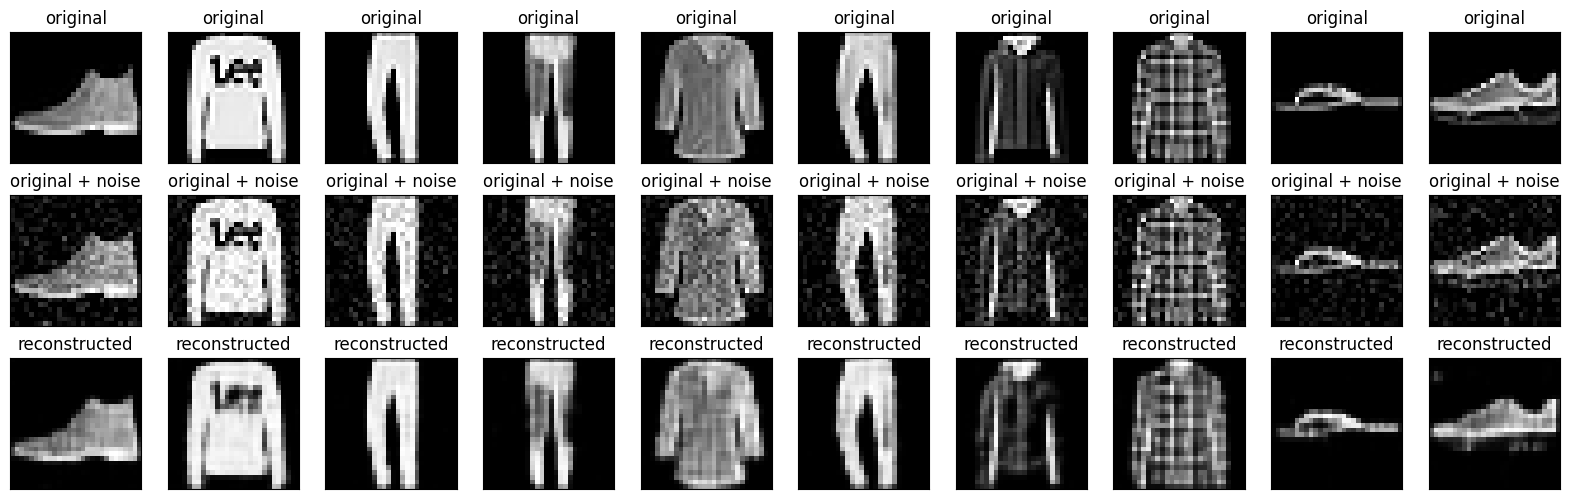

In [162]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display original + noise
    ax = plt.subplot(3, n, i + n + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [163]:
# •	Write the code implementation to calculate the loss (Mean Squared Error) for the test dataset.

x_test_loss = autoencoder.evaluate(x_test_noisy, x_test)
print('x_test_loss : ', x_test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0044
x_test_loss :  0.004453727509826422


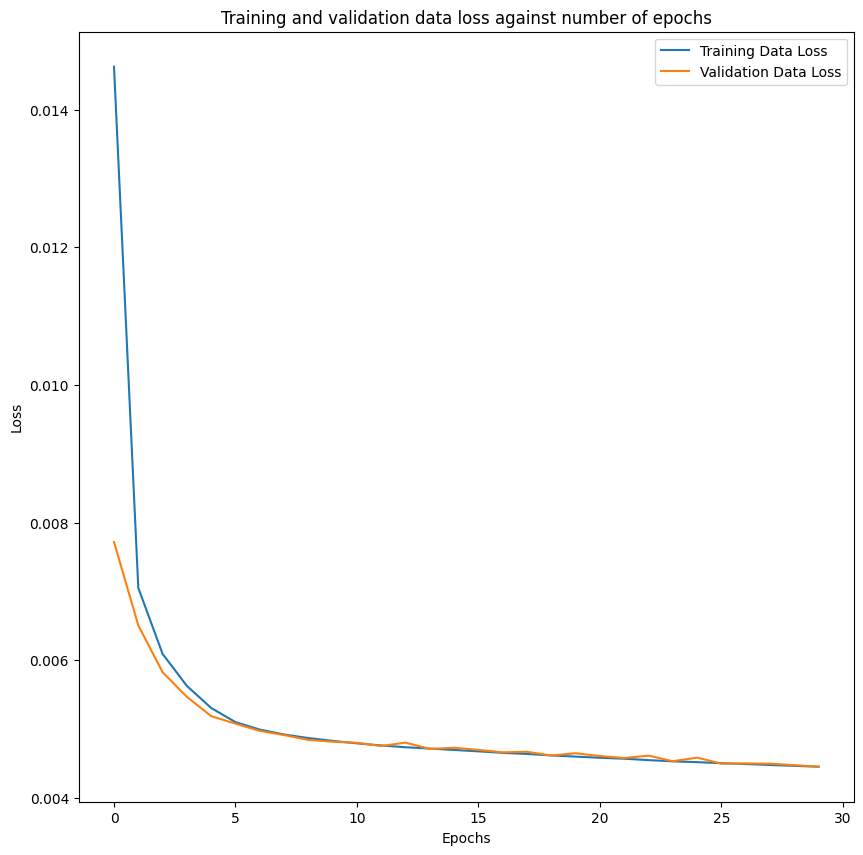

In [164]:
# •	Write the code implementation to plot the train and validation loss against number of epochs.

plt.figure(figsize=(10, 10))
plt.plot(loss_data.history['loss'], label='Training Data Loss')
plt.plot(loss_data.history['val_loss'], label='Validation Data Loss')
plt.title('Training and validation data loss against number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()